# Faster and Better Machine Learning

# Abstract (text)
$\beta$-Vae  Compared with 

## Special Codes for Collaboratory (code)
### Provides access to google drive
This code provides access to your google drive folder so files  can be saved

In [1]:
# if running on collaboratory set = True
collaboratory = True

if collaboratory:
    from google.colab import drive
    drive.mount('/content/drive')
else: 
    print('Running on local systems, if running on collaboratory please change above')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
if collaboratory:
    cd drive/My\ Drive

SyntaxError: ignored

In [ ]:
if collaboratory:
    cd ..

## Download Git Repository

In [3]:
import os

if os.path.exists("./Faster-than-Faster-Better-than-Better-Machine-Learning-Electromechanical-Switching-in-Ferroelec"):
    pass
else:
    # ferroelectric
    !git clone https://github.com/shuyuqin/Faster-than-Faster-Better-than-Better-Machine-Learning-Electromechanical-Switching-in-Ferroelec.git

In [4]:
cd "Faster-than-Faster-Better-than-Better-Machine-Learning-Electromechanical-Switching-in-Ferroelec"

/content/Faster-than-Faster-Better-than-Better-Machine-Learning-Electromechanical-Switching-in-Ferroelec


In [5]:
!git pull

Already up to date.


In [6]:
cd faster_code

/content/Faster-than-Faster-Better-than-Better-Machine-Learning-Electromechanical-Switching-in-Ferroelec/faster_code


## Implement and load the package

In [7]:
#TODO: Look to see if there is a nicer way to update packages to specific dependencies. ?? Requirement File.
# TODO: This can be put into the requirement document.


# Make sure needed packages are installed and up-to-date
import sys
# Installs base packages
!conda install --yes --prefix {sys.prefix} numpy scipy scikit-learn Ipython ipywidgets h5py

# Installs BGLib and PyUSID
!{sys.executable} -m pip install -U BGlib

/bin/bash: conda: command not found
Requirement already up-to-date: BGlib in /usr/local/lib/python3.7/dist-packages (0.0.2)


## Implement the particular version of package

In [8]:
# implements the packages with particular versions (If do not want to change the currrent version,
# can set up a new environment)
!pip install  -r requirements.txt

  Using cached https://files.pythonhosted.org/packages/52/46/ff47fea8e5c528c497fc385c95887131c4319a3411814ba9a766b66a9367/matplotlib-2.2.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/18/54/01a8c4e35c75ca9724d19a7e4de9dc23f0ceb8769102c7de056113af61c3/moviepy-1.0.3.tar.gz
  Using cached https://files.pythonhosted.org/packages/63/23/8b6acd2e9c0b427802dd45aacf0b2a0250893c3b26c7b1340589a588cc2a/natsort-7.1.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/eb/8e/d2f7a67cf8da9b83c1e3ee38dbf49448f3c8acb2cb38f76e4301f4a70223/Pillow-8.1.0-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/98/8b/36d178c3b98524fe5b1cc15d075d34e2e6e291c4b0461f6e901f1e0bc736/scikit_cuda-0.5.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d7/ee/753ea56fda5bc2a5516a1becb631bf5ada593a2dd44f21971a13a762d4db/scikit_image-0.17.2-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files

In [9]:
%load_ext autoreload
%autoreload 2

import codes.util.core as core
import codes.util.file as file
import codes.util.machine_learning as ml
import codes.util.dictionary_learning as dl

import tensorflow as tf
from tensorflow.random import set_seed

import numpy as np
from skimage import io

#import string
#import datetime
#import tensorflow_probability as tfp
#import sys
#sys.path.append('/content/pyNSID/')
#import pyNSID as nsid
import matplotlib.pyplot as plt
#import sidpy as sid
#import h5py
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
#from os.path import join as pjoin
#from scipy import ndimage
#import os
#from numpy.random import seed
#from tqdm import tqdm
from sklearn.decomposition import DictionaryLearning #PCA, NMF,
#import matplotlib.colors
#import warnings
#warnings.filterwarnings('ignore')
#from matplotlib.ticker import FormatStrFormatter
#from sklearn.decomposition import NMF
#from scipy import io as ios
#import os.path
#from matplotlib import cm
#from scipy.signal import savgol_filter as sg
#from scipy import interpolate
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
#import pandas as pd

## Formating

In [10]:
# Sets the print formatting
printing = {'PNG':True,
            'EPS':False, 
           'dpi': 300}

# Example on Generated Data
## Global Parameters (code)

In [11]:
save_path = './'        #Where to save figures
global_n = 5           # Number of components in dictionary learning analysis
add_in_save = ''       # Add into the figure save name
global_alp = [1,6,12]  # Alpha values to try

#path_to_data = './'

# Automatically generate a folder structure to save results
comp_folder = str(global_n)+'_comp/'
alp_folder = str(global_alp)+'_alp/'

# makes the folder
folder_name = file.make_folder(save_path+comp_folder+alp_folder)

## Generates Random Image and Spectra (Code)

In [12]:
# Sets random seed for reproducibility
seed = 2
np.random.seed(seed)

# generates random parameters for spectra
random_values = np.random.uniform(size=(10000,3))

# Generates spectra from random RGB values
random_data = core.generate_data(random_values)

## Generates Validation Data from Painting (Code)

In [13]:
# Loads dog image
image = io.imread('./nala.jpg')

# Crops dog image
image = image[200:1900:8, 100:1500:8]/255 #8 sets the downsampling

# Generates spectra from image of dog
dog_data = core.generate_data(image.reshape(-1,3))

## Visualize Generated Images (Code)

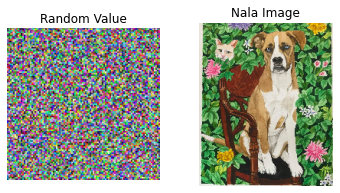

In [14]:
fig, ax = core.layout_fig(2, mod=2)
size = int(np.sqrt(random_values.shape[0]))

ax[0].imshow(random_values.reshape(size,size,3))
ax[0].set_axis_off()
ax[0].title.set_text('Random Value')
ax[1].imshow(image)
ax[1].set_axis_off()
ax[1].title.set_text('Nala Image')

## TODO: Show example of randomly generated spectra

## Preprocessing (Code)
### Normalization

In [15]:
#TODO: Add documentation to this

scaler = core.global_scaler()

scaled_data = scaler.fit_transform(random_data)

scaled_dog = scaler.transform(dog_data)

## Dictionary Learning Pipeline

### **Step 1:** Run a kmeans analysis (code)

In [20]:
#from the paper: Better, Faster, and Less Biased Machine Learning: Electromechanical Switching in Ferroelectric Thin Films. 
#doi: https://doi.org/10.1002/adma.202002425
#doi: 10.5281/zenodo.4030725 - Subject to original BSD-2 License.

# This is the number of true clusteres
nclusters = 3

# Fixes the seed
np.random.seed(seed)

# computes kmeans
kmeans = KMeans(n_clusters=nclusters, 
                random_state=0).fit(scaled_data)

### Step 2: Use clusters as initial guess for dictionary learning (code)

In [21]:
#from the paper: Better, Faster, and Less Biased Machine Learning: Electromechanical Switching in Ferroelectric Thin Films. 
#doi: https://doi.org/10.1002/adma.202002425
#doi: 10.5281/zenodo.4030725 - Subject to original BSD-2 License.

# extracts the labels
clusters_2nd = kmeans.labels_

# extracts the clusters 
centroids_2nd = kmeans.cluster_centers_

#### Reformat the kmeans results to use as the initial guess for Dictionary learning
labels = clusters_2nd
comp_init = np.zeros_like(centroids_2nd)
lm_init = np.zeros((len(labels),nclusters))

for i in range(nclusters):
    u = np.zeros_like(labels)
    u[labels==i] = 1
    lm_init[:,i] = u
    comp_init[i] = centroids_2nd[i]

### Step 3: Fit the dictionary learning model (code)

In [22]:
%%time

#from the paper: Better, Faster, and Less Biased Machine Learning: Electromechanical Switching in Ferroelectric Thin Films. 
#doi: https://doi.org/10.1002/adma.202002425
#doi: 10.5281/zenodo.4030725 - Subject to original BSD-2 License.

# Fixes the seed
np.random.seed(seed)

# instantiates the dictionary learning model
dictonary_model = DictionaryLearning(n_components=3,
                                     code_init=lm_init,
                                     dict_init = comp_init, 
                                     n_jobs=1, 
                                     max_iter=1000, 
                                     transform_algorithm='lasso_lars', 
                                     alpha=1, 
                                     fit_algorithm='cd',
                                     positive_code=True, 
                                     tol=1e-9)


# Fits the dictionary learning model
_ = dictonary_model.fit(scaled_data)

CPU times: user 21.1 s, sys: 4.09 s, total: 25.2 s
Wall time: 20.9 s


### Step 4: Generate the prediction of the dictionary learning model (code)

In [23]:
#from the paper: Better, Faster, and Less Biased Machine Learning: Electromechanical Switching in Ferroelectric Thin Films. 
#doi: https://doi.org/10.1002/adma.202002425
#doi: 10.5281/zenodo.4030725 - Subject to original BSD-2 License.

# Prediction on random data
dictionary_prediction = dictonary_model.transform(scaled_data)

# validation on dog data
dictionary_dog_prediction = dictonary_model.transform(scaled_dog)

### Step 5: Computes the reconstruction of the spectra from the dictionary model (code)

In [24]:
return_data_random = np.dot(dictionary_prediction, dictonary_model.components_)
return_data_dog = np.dot(dictionary_dog_prediction, dictonary_model.components_)

###  Step 6: Visualize the Generated Results and the Embedding map 

TODO: Add the spectra generator

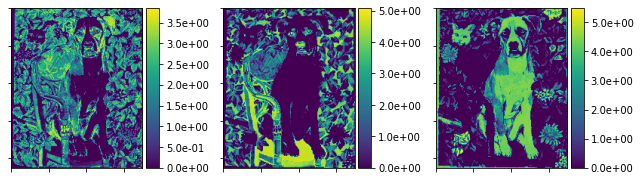

In [25]:
figure1 = core.embedding_maps(dictionary_dog_prediction, image)

In [26]:
# TODO: add comments

folder = 'generator_/dl_dog'

generator_dictionary_maker = core.generator(dictonary_model,scaled_dog,image)
generator_dictionary_maker.generator_images(folder = folder, 
                                 number_of_loops=20)


movie_name = 'dictionary_learning_generator_movie'


file.make_movie(movie_name,
                folder,
                folder,
                'png',
                1, 
               output_format='mp4')

100%|██████████| 20/20 [00:36<00:00,  1.83s/it]


[MoviePy] >>>> Building video generator_/dl_dog/dictionary_learning_generator_movie.mp4
[MoviePy] Writing video generator_/dl_dog/dictionary_learning_generator_movie.mp4


 95%|█████████▌| 20/21 [00:04<00:00,  4.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: generator_/dl_dog/dictionary_learning_generator_movie.mp4 



In [27]:
#TODO: Try to see if you can get this to display
from IPython.display import Video
Video(folder + movie_name + '.mp4', embed=True)

ImportError: ignored

## Long-Short Term Memory beta Variational Autoencoder Pipline (code)

### Step 1: Builds the model (code)

In [22]:
#if exists(model_dnn):
#  del model_dnn


import random
import logging

def set_seeds(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)

def set_global_determinism(seed=seed, fast_n_close=False):
  """
      Enable 100% reproducibility on operations related to tensor and randomness.
      Parameters:
      seed (int): seed value for global randomness
      fast_n_close (bool): whether to achieve efficient at the cost of determinism/reproducibility
  """
  set_seeds(seed=seed)
  if fast_n_close:
      return

  logging.warning("*******************************************************************************")
  logging.warning("*** set_global_determinism is called,setting full determinism, will be slow ***")
  logging.warning("*******************************************************************************")

  os.environ['TF_DETERMINISTIC_OPS'] = '1'
  os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
  # https://www.tensorflow.org/api_docs/python/tf/config/threading/set_inter_op_parallelism_threads
  tf.config.threading.set_inter_op_parallelism_threads(1)
  tf.config.threading.set_intra_op_parallelism_threads(1)
  from tfdeterminism import patch
  patch()

#TODO train again with fixed seed and current data.
beta = 0

set_global_determinism(42)

model_dnn = ml.model_builder(np.atleast_3d(scaled_data),embedding=16, 
              VAE=True, l1_norm_embedding=1e-3,coef=beta)

optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)

model_dnn.vae.compile(optimizer, loss=tf.keras.losses.MeanSquaredError())

RuntimeError: ignored

In [ ]:
retrain = True




if retrain: 

    ml.Train(20000,
             2000,
             100,
             0,
             0.005,
             scaled_data,
             'scaled_data',
             ith_epoch=None,
             file_path=None,
             batch_size=300)
else: 
    # Load pretrained weights
    model_dnn.vae.load_weights('./scaled_data/beta=0.1300_beta_step_size=0.005_16_layer_size_128_l1_norm_0_l1_norm_1e-05_VAE_True/phase_shift_only0.1300_epochs_begin_2000+2600+0093-0.07321.hdf5')

## generate the embedding map

In [ ]:
%%time
embedding = model_dnn.encoder_model.predict(np.atleast_3d(scaled_dog))

CPU times: user 28.4 s, sys: 2.81 s, total: 31.2 s
Wall time: 22.1 s


In [ ]:
embedding.shape

(37275, 16)

In [ ]:
np.sqrt(37275)

193.06734576307824

In [ ]:
image.shape

(213, 175, 3)

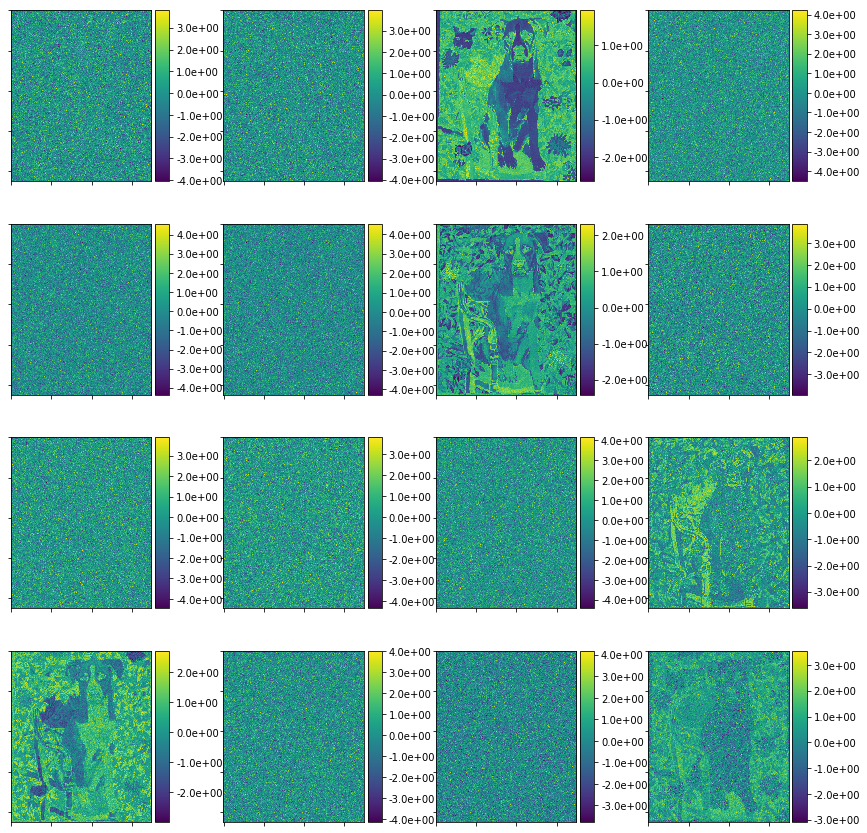

In [ ]:
#Show the movie how the embedding changes and select the 3 channel activated.
figure2 = core.embedding_maps(embedding, image,mod=4)

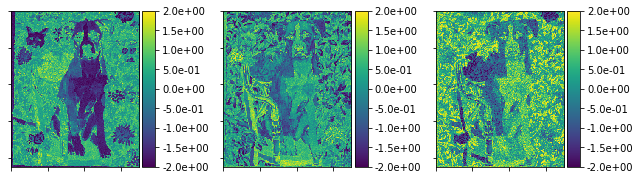

In [ ]:
figure2 = core.embedding_maps(embedding[:,[2,6,12]], image, c_lim=[-2,2])

## generate the prediction of the nn model

In [ ]:
%%time
random_nn_out = model_dnn.vae.predict(np.atleast_3d(scaled_data)) 

CPU times: user 18.3 s, sys: 1.31 s, total: 19.6 s
Wall time: 15 s


## generate movie of the embedding result

  0%|          | 0/200 [00:02<?, ?it/s]


IndexError: too many indices for array

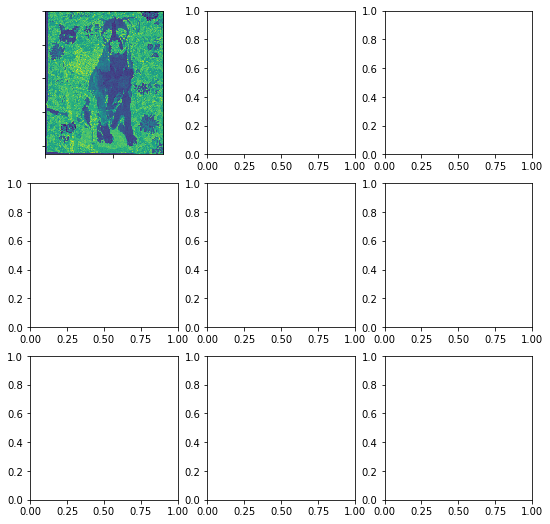

In [ ]:
generator_dictionary_maker = core.generator(model_dnn,scaled_dog,image,channels=[2,6,12])
generator_dictionary_maker.generator_images(folder = './dog_gen_test/', 
                                 number_of_loops=200)

In [ ]:
file.make_movie('dog_gen_movie',
          './dog_gen_test/',
          './dog_gen_test/',
          'png',
          5)

## Compare the results of two models

In [ ]:
x = np.linspace(-1,1,25)

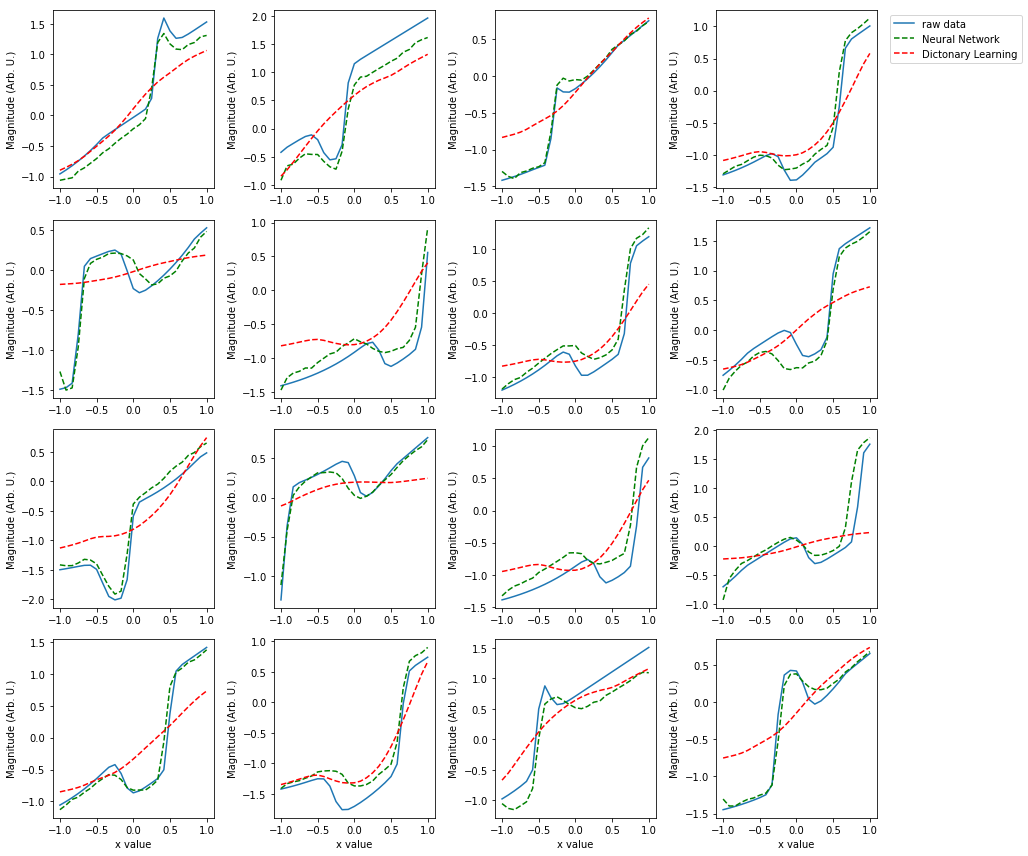

In [ ]:
fig, ax = core.layout_fig(16, mod=4, x=1.2)

ind = np.random.randint(0,scaled_data.shape[0],size=16)

ax=ax.ravel()

for i, ax in enumerate(ax):
    ax.plot(x, scaled_data[ind[i]], label='raw data')
    ax.plot(x, random_nn_out[ind[i]].squeeze(),'g--', label = 'Neural Network')
    ax.plot(x, return_data_random[ind[i]]
            ,'r--', label = 'Dictonary Learning')
    #ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
    ax.set_ylabel('Magnitude (Arb. U.)')

    if i > 11:
      ax.set_xlabel('x value')
    
    if i == 3:
        ax.legend(bbox_to_anchor =(1.05, 1))
        
plt.tight_layout()

In [ ]:





# imports the raw band excitation data dictionary learning
imported = {'data': ios.matlab.loadmat(path_to_data+'Data.mat'),
            'validation_data': ios.matlab.loadmat(path_to_data+'loop_1.mat')}

# extracts the important information from the raw data
raw = {'voltage': imported['data']['Voltagedata_mixed'],
       'piezoresponse': imported['data']['Loopdata_mixed'],
       'amplitude': imported['data']['OutA2_mixed'],
       'phase': imported['data']['OutPhi2_mixed'],
       'resonance': imported['data']['Outw2_mixed'],
       'quality_factor': imported['data']['OutQ2_mixed'],
       'val_piezoresponse': imported['validation_data']['piezo_1'],
       'val_resonance': imported['validation_data']['resonance_loop_1']}

## load the pretrained data

In [ ]:
#refer to jagar paper to load the piezo and resonance data in the same format
pie_data = np.load('pizoresponse.npy')
res_data = np.load('resonance.npy')
res_data = np.atleast_3d(res_data)
new_data = np.concatenate((pie_data,res_data),axis=2)
vol = np.load('voltage.npy')

TODO: You need a figure to show how you generate the data

Show random generated spectra and equation

# Dictionary Learning for combination of piezoresponse and resonance data 
The dictionary learning is based on the result of the paper: Better, Faster, and Less Biased Machine Learning:
Electromechanical Switching in Ferroelectric Thin Films.The ORCID identification number(s) for the author(s) of this article
can be found under https://doi.org/10.1002/adma.202002425.


## import and clean the data

In [ ]:
# These cleaning steps were also performed in [1,2]
dl.range_filter(raw['resonance'], [1300, 1340])          # "Hard limit" replace resonance values outside the specified range with NaN     
dl.range_filter(raw['val_resonance'], [1300, 1340])      # Same for the first cycle resonance
dl.clean_interpolate(raw['resonance'],'linear').reshape(-1, raw['resonance'].shape[2])    #Interpolate those NaNs

array([[1316.56298484, 1316.85098085, 1316.4753691 , ..., 1317.9234046 ,
        1318.10937733, 1318.03857044],
       [1319.31182758, 1319.11098001, 1319.36025077, ..., 1320.27286958,
        1320.16729895, 1320.17534472],
       [1319.29792087, 1319.05178431, 1319.07999963, ..., 1319.37266502,
        1319.58981849, 1319.87632619],
       ...,
       [1327.44357597, 1327.31951814, 1327.33201154, ..., 1327.70510708,
        1327.78603897, 1327.80754424],
       [1327.17790234, 1327.34066654, 1327.21556803, ..., 1327.87324892,
        1327.72284503, 1327.75400904],
       [1326.7496446 , 1326.96006052, 1326.98423162, ..., 1327.18681378,
        1327.33968267, 1327.23022542]])

## Extract and Format

In [ ]:
# extract the second cycle data (amplitude, phase, resonance, and Q)
second_amp = np.reshape(raw['amplitude'],(3600,96))
second_ph = np.reshape(raw['phase'],(3600,96))
second_res = np.reshape(raw['resonance'],(3600,96))
second_q = np.reshape(raw['quality_factor'],(3600,96))

# Extract the provided "optimal rotation angle"
opt_ang = np.reshape(imported['data']['optrotang_mixed'],(3600))

# Resonstrcut the second cycle PR
second_ph = second_ph+np.mean(opt_ang)
second_pr = second_amp*np.cos(np.deg2rad(second_ph))

#Extract voltage data
v_cycle = imported['data']['VoltageDC_mixed'][:,0].squeeze()



In [ ]:
# Replace any infinte values in the amplitude/phase curves with NaN. NaNs can be ignored when taking the mean, infs can't.
second_amp[~np.isfinite(second_amp)] = np.nan
second_ph[~np.isfinite(second_ph)] = np.nan

# Get the mean maps for plotting later
sA_mean = np.nanmean(second_amp, axis=1)
sP_mean = np.nanmean(second_ph, axis=1)
sR_mean = np.nanmean(second_res, axis=1)
sQ_mean = np.nanmean(second_q, axis=1)
sPR_mean = np.nanmean(second_pr, axis=1)



In [ ]:
all_second = np.hstack([second_pr,second_res])       #Here we are interested in the piezoresponse and the resonance
num_vars = 2     # Thats two variables

#We have to account for infinite values (bad fits) in the piezoresponse
x, y = np.where(~np.isfinite(all_second))
all_second[x, y] = 0

#-------------Generate all of the various labels to use in the data frame
times = 96
all_vals = np.repeat('PR', times)
for var in ['Res']:
    varlist = np.repeat(var, times)
    all_vals = np.hstack([all_vals,varlist])

xvals = np.hstack([v_cycle,v_cycle])
chirps = np.tile(np.arange(times),num_vars)
inout = np.tile(np.full(times, 0),num_vars)
plotgroup = np.tile(np.full(times, 0),num_vars)
arrays =[all_vals,chirps,inout,plotgroup,xvals]

cols = pd.MultiIndex.from_tuples(list(zip(*arrays)), names=['Vars', 'ChirpNum','InOut','PlotGroup','xaxis'])
index = pd.Index(np.arange(3600).astype(int),name='Acq')
#---------------

# Create the dataframe
second_data = pd.DataFrame(all_second, columns=cols, index=index)

## Use Kmeans to highlight outliers

In [ ]:
res_mean = np.mean(second_data['Res'],axis=1)
pie_mean = np.mean(second_data['PR'],axis=1)

### Remove Mean and Scale PR

In [ ]:
scale = 3 # Constant to scale PR by such that resonance and PR have the same standard deviation

# For each row of data (i.e. spatial point), remove the mean of the row
second_data['Res'] = second_data['Res'].apply(lambda x: x-x.mean(), axis=1)
second_data['PR'] = second_data['PR'].apply(lambda x: x-x.mean(), axis=1)

#Scale piezoresponse
second_data['PR'] = second_data['PR']*scale*1e4

In [ ]:
# Run kmeans
var = ['Res']         # Variable to run
data = second_data    # Data to run
voltages = v_cycle    # x-axis data, i.e. voltages

orig_shape = [60,60]
nclusters = 8
voltages = data[var].columns.get_level_values('xaxis')

kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(data[var])
clus_mean_removal = kmeans.labels_.reshape((orig_shape[0], orig_shape[1]))
cent_mean_removal = kmeans.cluster_centers_

### Run a final kmeans analysis

In [ ]:
vol = np.load('voltage.npy')

In [ ]:
stack_vars = ['PR','Res']
data_list = ['PR','Res']
data = all_second
voltages = v_cycle

orig_shape = [60,60]
nclusters = global_n

stacked_dataset = second_data

#kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(stacked_dataset.values[~flags,:])
kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(stacked_dataset.values)
clusters_2nd = kmeans.labels_
centroids_2nd = kmeans.cluster_centers_

## Run Dictionary Learning

In [ ]:
%%time
# Lists to save all of the components/maps
comps = []
maps = []

voltages = v_cycle              #Voltage values
stacked_dataset = second_data  #The data to analyze

# For each alpah value listed above
for alp in global_alp:

    orig_shape = [60,60]       # Don't forget this is a 60,x60 grid
    sparsity = alp             # Alpha value for this iteration
    iterations = 10000         # Max number of iterations
    num_components = global_n  # Number of components to find

#    dataset_analysis = stacked_dataset.values[~flags,:]    # Remove the above "bad" points from consideration
    dataset_analysis = stacked_dataset.values
    #### Reformat the kmeans results to use as the initial guess for Dictionary learning
    labels = clusters_2nd
    comp_init = np.zeros_like(centroids_2nd)
    lm_init = np.zeros((len(labels),num_components))
    for i in range(num_components):
        u = np.zeros_like(labels)
        u[labels==i] = 1
        lm_init[:,i] = u
        comp_init[i] = centroids_2nd[i]
        
    # Set up dictionary learning model
    model = DictionaryLearning(n_components=num_components, code_init=lm_init, dict_init = comp_init, n_jobs=-1, max_iter=iterations, transform_algorithm='lasso_lars', alpha=sparsity, fit_algorithm='cd',positive_code=True, tol=1e-9)
    
    # Fit and get weight maps/ components
    DL_loading_maps = model.fit_transform(dataset_analysis)
    DL_components = model.components_

CPU times: user 18min 5s, sys: 43min 26s, total: 1h 1min 32s
Wall time: 23min 34s


## Visualize the fit and transform of the model 

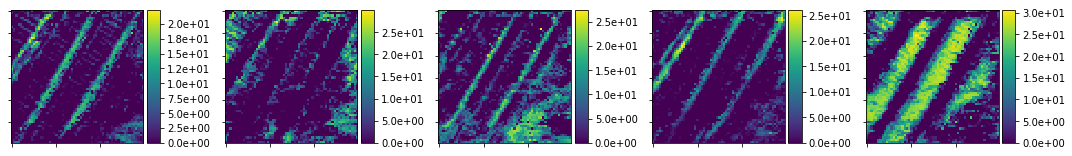

In [ ]:
figure3=core.embedding_maps(DL_loading_maps, np.zeros((60,60)), mod = 5)

In [ ]:
# modeify the figure below

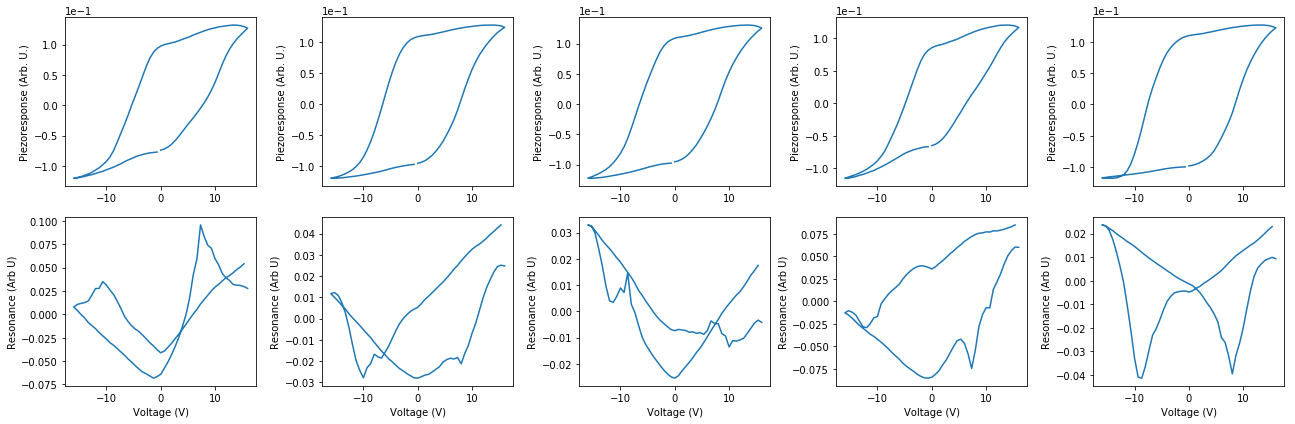

In [ ]:
fig, ax = core.layout_fig(10, mod=5, x=1.2)

ax = ax.ravel()

for i, ax in enumerate(ax):
    
    if i < 5:
        ax.plot(voltages,DL_components[i][0:96])
        ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
        ax.set_ylabel('Piezoresponse (Arb. U.)')
        
    else: 
        ax.plot(vol,DL_components[i-5][96::])
        ax.set_ylabel('Resonance (Arb U)')
        ax.set_xlabel('Voltage (V)')
        #ax.set_ylim([1324.5,1325.5])
        
plt.tight_layout()

In [ ]:
new_test_ = DL_components[0]
new_test_.shape

(192,)

## Generate the generator of the  dictionary model

In [ ]:
DL_components.shape
dataset_analysis.shape

(3600, 192)

In [ ]:
np.dot( model.components_)

(3600, 5)

In [ ]:
Gan = core.generator(model,dataset_analysis,np.zeros((60,60)))
Gan.generator_images('generator_/dl_pr', number_of_loops=20,graph_layout=[5,5], model_tpye='nn',xvalues=vol)


100%|██████████| 20/20 [00:58<00:00,  2.91s/it]


## Use the model generate the reconstraction data and unscale the data for comparision

In [ ]:
out_dl = np.dot(DL_loading_maps,DL_components)

In [ ]:
out_dl_unscale = np.copy(out_dl)
for i in range(out_dl.shape[0]):
    out_dl_unscale[i,0:96] = out_dl_unscale[i,0:96]/(3*1e4)+pie_mean[i]
    out_dl_unscale[i,96:192] = out_dl_unscale[i,96:192]+res_mean[i]

# LSTM Neural Network Autoencoder for combination of piezoresponse and resonance data 




## load the pretrained data

In [ ]:
pie_data = np.load('pizoresponse.npy')
res_data = np.load('resonance.npy')
res_data = np.atleast_3d(res_data)
new_data = np.concatenate((pie_data,res_data),axis=2)
vol = np.load('voltage.npy')

## Implement the model

## Set the training parameters 

In [ ]:
epochs=62000 
epoch_per_increase = 1000
iteration = (epochs//epoch_per_increase) + 1
iteration

## Train the model

## Load the pretrained weights

In [ ]:
nn_model = ml.model_builder_combine(np.atleast_3d(new_data),embedding=16, 
              VAE=True, l1_norm_embedding=1e-9,coef=0)

In [ ]:
nn_model.vae.load_weights('phase_shift_only0.0175_epochs_begin_6000+7000+0966-0.01752.hdf5')

## Or train the data from the beginning

In [ ]:
folder_ = core.make_folder('/content/drive/My Drive/papers/Faster_better_v2_Training/two_data_combined/piezoresponse+resonacnce')


In [ ]:
ml.Train(epochs,epoch_per_increase,0,0.0025,new_data,folder_)

## Generate the reconstraction data 

In [ ]:
%%time
nn_out = nn_model.vae.predict(np.atleast_3d(new_data))


CPU times: user 18.9 s, sys: 890 ms, total: 19.8 s
Wall time: 17.5 s


## Unscale the data for comparision

In [ ]:
unscaled_pie = nn_out[:,:,0]*7.859902800847493e-05 -1.0487273116670697e-05
unscaled_res = nn_out[:,:,1]*3.1454182388943095+1324.800141637855

## plot the embedding channels

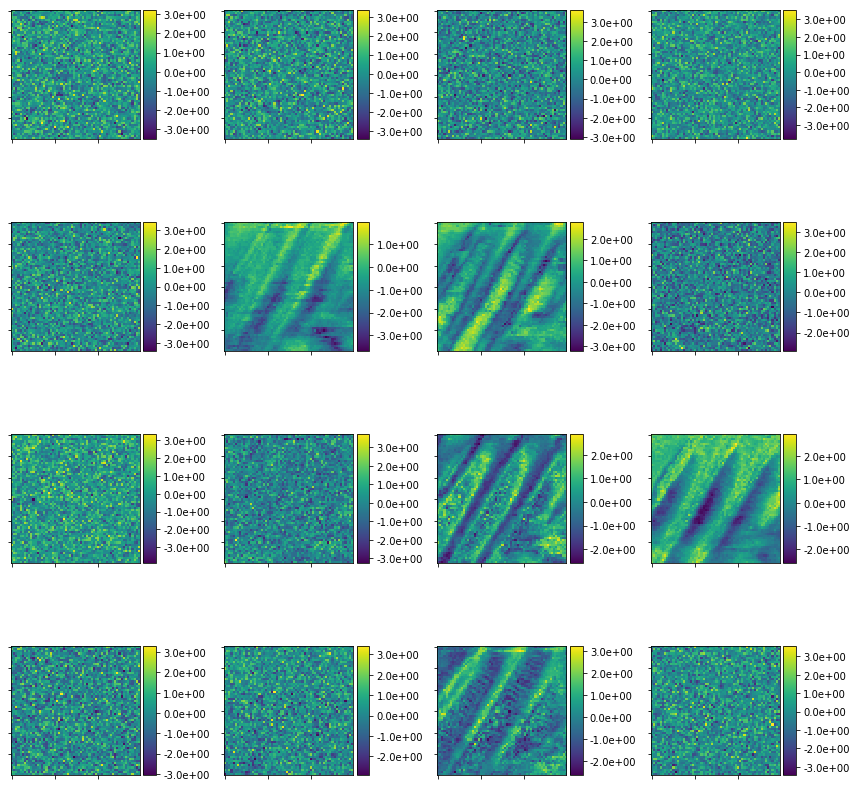

In [ ]:
embedding = nn_model.encoder_model.predict(np.atleast_3d(new_data))
image = np.zeros((60,60,3))
figure4 = core.embedding_maps(embedding, image, mod=4)

In [ ]:
core.embedding_maps()

/home/shuyu/497_MAT_Assignment


In [ ]:
nn_model.vae.load_weights('./two_data_combine/beta=0.0150_beta_step_size=0.0025_16_layer_size_128_l1_norm_0_l1_norm_1e-05_VAE_True/phase_shift_only_0.0150_epochs_begin_6000+11000+0951-0.01548.hdf5')

## Generate the movie

In [ ]:
folder = 'generator_/neural_network_pr'
channels = [3,4,8,12,14]

In [ ]:
new_data.shape

(3600, 96, 2)

In [ ]:
Gan = core.generator(nn_model,new_data,np.zeros((60,60)),channels=channels)
Gan.generator_images(folder, graph_layout=[5,5], xvalues=vol)

100%|██████████| 200/200 [10:50<00:00,  3.25s/it]


## Make movie of the generator

In [ ]:
nn_pr_movie = 'nn_pr_movie'
folder_extract_image = folder
folder_save_movie = 'generator_/'
file.make_movie(nn_pr_movie,folder_extract_image,folder_save_movie,'png',5)

t:   0%|          | 0/201 [00:00<?, ?it/s, now=None]

Moviepy - Building video generator_//nn_pr_movie.mp4.
Moviepy - Writing video generator_//nn_pr_movie.mp4



Moviepy - Done !
Moviepy - video ready generator_//nn_pr_movie.mp4


In [ ]:
plot_format = {
    # adds scalebar to image
    'add_scalebar': False,
    # sets the dimensions for the scalebar [(size of image),(size of scalebar)]
    'scalebar': [2000, 500],
    # selects if the image will be rotated
    'rotation': False,
    # selects the rotation angle of the image
    'angle': 60.46,
    # sets the fraction of the image to crop
    'frac_rm': 0.17765042979942694,
    # sets the resolution of the image
    'dpi': 300,
    # sets the default colormap
    'color_map': 'viridis',
    # sets if color bars should be added
    'color_bars': True}
# Sets what object to export
printing = {  # exports eps vector graphics (note these files can be large)
    'EPS': False,
    # exports png files
    'PNG': True,
    # prints image series (note this can take some time)
    'all_figures': False,
    # generates movies (note this can take some time)
    'movies': False,
    # resolution of the images
    'dpi': 300}

# Compare results of two models

## Load the raw data 

In [ ]:
ori_pie = pie_data*7.859902800847493e-05 -1.0487273116670697e-05
ori_res = res_data*3.1454182388943095+1324.800141637855


## Plot the raw data, DL result and NN result

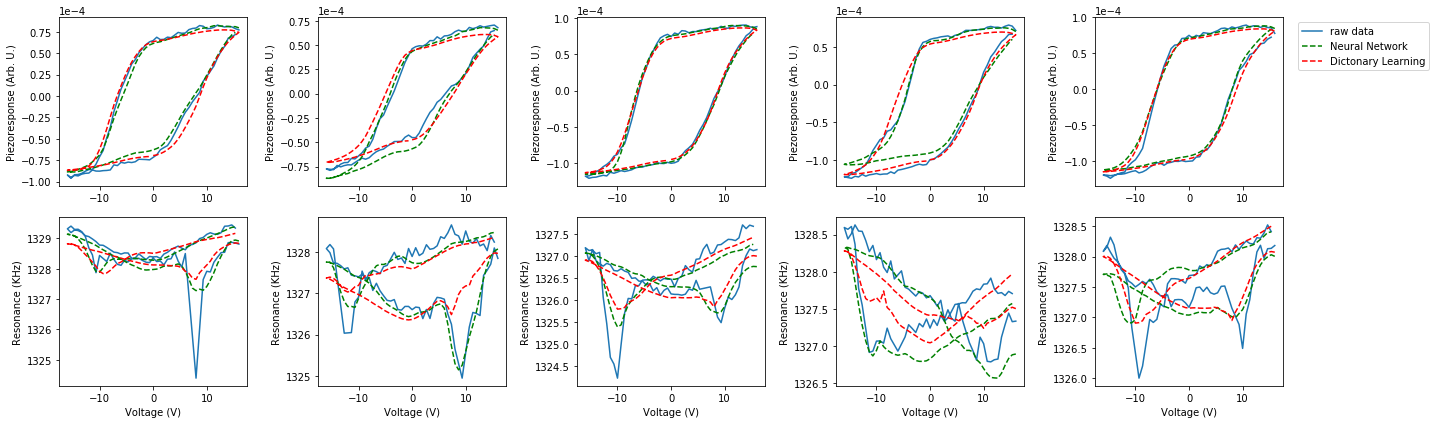

In [ ]:
fig, ax = core.layout_fig(10, mod=5, x=1.2)

ind = np.random.randint(0,3600,size=5)

ax=ax.ravel()

for i, ax in enumerate(ax):
    
    if i < 5:
#        ax.plot(voltages, orig_data[ind[i//2], 0:96])
        ax.plot(vol,ori_pie[ind[i]], label='raw data')
        ax.plot(vol,unscaled_pie[ind[i]],'g--', label = 'Neural Network')
        ax.plot(voltages,out_dl_unscale[ind[i],0:96],'r--', label = 'Dictonary Learning')
        ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
        ax.set_ylabel('Piezoresponse (Arb. U.)')
    else:
#        ax.plot(vol,orig_data[ind[i//2],96:192])
        ax.plot(vol,ori_res[ind[i-5]])
        ax.plot(vol,unscaled_res[ind[i-5]],'g--')
        ax.plot(vol,out_dl_unscale[ind[i-5],96:192],'r--')
        ax.set_ylabel('Resonance (KHz)')
        ax.set_xlabel('Voltage (V)')
    
    if i == 4:
        ax.legend(bbox_to_anchor =(1.05, 1))
        
plt.tight_layout()

file.savefig(f'./example_{ind}_maps', printing)

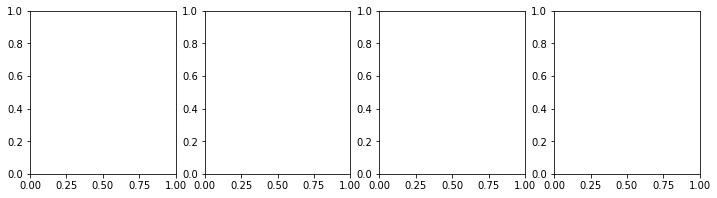

In [ ]:
fig1,ax1 = core.layout_fig(4,4)

In [ ]:
int( 994/17)

58

In [ ]:
int(994%17/5)

1

In [ ]:
int(994%17

8

In [ ]:
flo = 'M'*10

In [ ]:
flo

'MMMMMMMMMM'

In [ ]:
bool(int(-1))

True